In [81]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [82]:
df = pd.read_csv('data/download_data/sp500_joined_closes.csv')
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()


,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.040546,-0.014514,-0.028988,NaN,NaN,-0.030891,-0.010472,-0.087618,0.000000,NaN,...,NaN,-0.028987,NaN,0.022765,NaN,-0.020305,-0.014533,NaN,-0.049635,NaN
2000-01-05,0.028554,-0.002929,-0.001839,NaN,NaN,0.003913,-0.015915,0.019578,-0.009661,NaN,...,NaN,0.013909,NaN,0.037860,NaN,0.005115,0.018963,NaN,-0.001184,NaN
2000-01-06,0.077358,-0.014771,0.034393,NaN,NaN,-0.019724,0.005333,0.008130,0.013260,NaN,...,NaN,-0.004153,NaN,-0.009331,NaN,-0.008539,-0.055665,NaN,0.014118,NaN
2000-01-07,0.019657,0.040822,0.010619,NaN,NaN,0.027506,0.015831,0.047440,0.022500,NaN,...,NaN,-0.015374,NaN,0.000000,NaN,-0.022551,-0.011160,NaN,0.002333,NaN
2000-01-10,-0.004879,0.011363,-0.007067,NaN,NaN,0.049159,0.000000,0.037883,0.024292,NaN,...,NaN,0.042736,NaN,0.000000,NaN,0.039558,0.033114,NaN,-0.018230,NaN


In [83]:
df.shape

(5911, 503)

<Axes: xlabel='Date'>

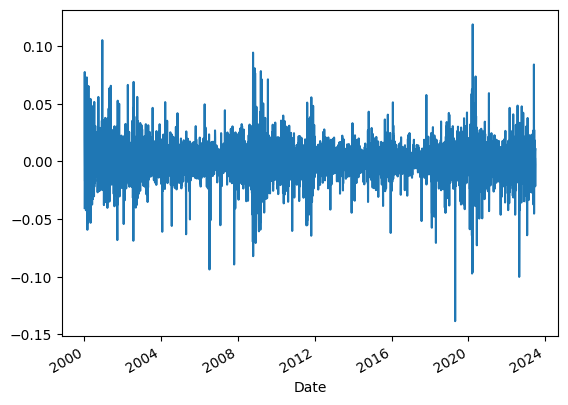

In [84]:
df.MMM.plot()

In [85]:
df.rolling('30d', 250)
import numpy as np    
n = 100
matrix = np.zeros((n,2)) # Pre-allocate matrix
for i in range(1,n):
    matrix[i,:] = [3*i, i**2]

In [86]:
n = df.shape[0]
step = 30
length = 250
list(range(0, n, step))
stop = int(n-length)
train = np.zeros((stop, length, ))
# for i in range(0, stop, step):
i = 0   
aux = df[i:i+length]
aux = aux.dropna(axis='columns') 
fix_companies = aux.columns

In [87]:
len(fix_companies)

363

In [88]:
df

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.040546,-0.014514,-0.028988,NaN,NaN,-0.030891,-0.010472,-0.087618,0.000000,NaN,...,NaN,-0.028987,NaN,0.022765,NaN,-0.020305,-0.014533,NaN,-0.049635,NaN
2000-01-05,0.028554,-0.002929,-0.001839,NaN,NaN,0.003913,-0.015915,0.019578,-0.009661,NaN,...,NaN,0.013909,NaN,0.037860,NaN,0.005115,0.018963,NaN,-0.001184,NaN
2000-01-06,0.077358,-0.014771,0.034393,NaN,NaN,-0.019724,0.005333,0.008130,0.013260,NaN,...,NaN,-0.004153,NaN,-0.009331,NaN,-0.008539,-0.055665,NaN,0.014118,NaN
2000-01-07,0.019657,0.040822,0.010619,NaN,NaN,0.027506,0.015831,0.047440,0.022500,NaN,...,NaN,-0.015374,NaN,0.000000,NaN,-0.022551,-0.011160,NaN,0.002333,NaN
2000-01-10,-0.004879,0.011363,-0.007067,NaN,NaN,0.049159,0.000000,0.037883,0.024292,NaN,...,NaN,0.042736,NaN,0.000000,NaN,0.039558,0.033114,NaN,-0.018230,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27,-0.021645,0.018434,-0.006657,-0.017567,0.011367,0.008715,0.003389,0.020150,0.000325,0.015191,...,0.005593,0.029516,0.004834,-0.006704,0.008458,0.000372,0.034901,0.013907,0.008091,0.018510
2023-06-28,0.003150,-0.001939,-0.001671,-0.000679,0.003021,-0.006320,0.000676,-0.014079,0.000000,-0.003519,...,-0.001632,0.003226,-0.014381,-0.019405,-0.009633,0.006532,0.002402,-0.005609,-0.007722,-0.009242
2023-06-29,0.006774,0.003460,0.000465,0.005419,0.021671,-0.006239,0.009155,0.002774,0.003935,0.002201,...,0.002928,0.011972,0.002395,0.000816,0.007211,0.015418,0.018142,0.007954,0.006989,0.016248


In [89]:
len(list(range(0, stop, step)))

189

In [90]:
data = np.empty(( len(list(range(0, stop, step))), length, len(fix_companies)))
data.shape

(189, 250, 363)

In [91]:
df.shape

(5911, 503)

In [92]:
stop

5661

In [93]:

for i,j in zip(range(0, stop, step), range(len(list(range(0, stop, step))))):
    aux = df[i:i+length][fix_companies]
    data[j,:,:] = aux.values  


In [94]:
data.shape

(189, 250, 363)

In [95]:
aux.values

array([[-0.01502659, -0.00524587, -0.00803143, ..., -0.01406359,
        -0.03608281, -0.00985573],
       [ 0.00164269,  0.01678793, -0.00128763, ...,  0.00638664,
         0.00196957,  0.00617116],
       [ 0.00450395, -0.00113204,  0.0039434 , ...,  0.00692846,
         0.00023852,  0.00875055],
       ...,
       [-0.00911928,  0.0003    , -0.01134046, ..., -0.01606865,
         0.01149308,  0.00868513],
       [-0.02904571, -0.04210993,  0.0028472 , ...,  0.00701813,
        -0.019648  , -0.05766718],
       [ 0.01034181,  0.00995967,  0.00800707, ...,  0.02728764,
         0.01373021,  0.01382843]])

In [96]:
data[-1]

array([[-0.01502659, -0.00524587, -0.00803143, ..., -0.01406359,
        -0.03608281, -0.00985573],
       [ 0.00164269,  0.01678793, -0.00128763, ...,  0.00638664,
         0.00196957,  0.00617116],
       [ 0.00450395, -0.00113204,  0.0039434 , ...,  0.00692846,
         0.00023852,  0.00875055],
       ...,
       [-0.00911928,  0.0003    , -0.01134046, ..., -0.01606865,
         0.01149308,  0.00868513],
       [-0.02904571, -0.04210993,  0.0028472 , ...,  0.00701813,
        -0.019648  , -0.05766718],
       [ 0.01034181,  0.00995967,  0.00800707, ...,  0.02728764,
         0.01373021,  0.01382843]])

In [97]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
print(data.shape, train.shape, test.shape)

(189, 250, 363) (151, 250, 363) (38, 250, 363)


In [99]:
if not os.path.exists('master_data'):
        os.makedirs('master_data')
np.save('master_data/train.npy', train)
np.save('master_data/test.npy', test)
np.save('master_data/fix_companies.npy', fix_companies)
np.save('master_data/data.npy', data)